In [3]:
%pip install matplotlib
%pip install pandas
%pip install seaborn
%pip install scikit-learn
%pip install pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/molecular-biology/promoter-gene-sequences/promoters.data'
names = ['Class', 'id', 'Sequence']
data = pd.read_csv(url, names = names)

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.5 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.0/11.5 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.0/11.5 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.0/11.5 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.0/11.5 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.0/11.5 MB 1.3 MB/s eta 0:00:09
   ---------------------------------------- 0.0/11.5 MB 140.3 kB/s eta 0:01:22
   ---------------------------------------- 0.1/11.5 MB 204.8 kB/s eta 0:00:56
   ---------------------------------------- 0.1/11.5 MB 204.8 kB/s eta 0:00:56
   ---------------------------------------- 0.1/11.5 MB 229.0 kB/s eta 0:00:50
   ---------------------------------------- 0.1/11.5 MB 229.0 kB/s eta 0:00:50
   ----


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.9 MB 217.9 kB/s eta 0:00:51
   ---------------------------------------- 0.0/10.9 MB 217.9 kB/s eta 0:00:51
   ---------------------------------------- 0.0/10.9 MB 187.9 kB/s eta 0:00:59
   ---------------------------------------- 0.0/10.9 MB 187.9 kB/s eta 0:00:59
   ---------------------------------------- 0.0/10.9 MB 187.9 kB/s eta 0:00:59
   ---------------------------------------- 0.0/10.9 MB 151.3 kB/s eta 0:01:13
   ---------------------------------------- 0.0/10.9 MB 151.3 kB/s eta 0:01:13
   ---------------------------------------- 0.1/10.9 MB 182.2 kB/s eta 0:01:00
   ---------------------------------------- 0.1/10.9 MB 229.0 kB/s eta 0:00:48
   --------------


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle

[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [4]:
data.head(10)

,Class,id,Sequence
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
5,+,MALEFG,\taggggcaaggaggatggaaagaggttgccgtataaagaaactag...
6,+,MALK,\t\tcagggggtggaggatttaagccatctcctgatgacgcatagt...
7,+,RECA,\t\ttttctacaaaacacttgatactgtatgagcatacagtataat...
8,+,RPOB,\t\tcgacttaatatactgcgacaggacgtccgttctgtgtaaatc...
9,+,RRNAB_P1,\tttttaaatttcctcttgtcaggccggaataactccctataatgc...


In [5]:
data.shape

(106, 3)

In [6]:
data.dtypes

Class       object
id          object
Sequence    object
dtype: object

In [7]:
# Refining and structuring the data

# Build our dataset using custom pandas dataframe
classes = data.loc[:,'Class']
classes.head()
print()
print(classes.value_counts())


Class
+    53
-    53
Name: count, dtype: int64


In [8]:
# generate list of DNA sequence
sequence = list(data.loc[:, 'Sequence'])
sequence[-1]

'\t\ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaact'

In [9]:
#Remove tab from each sequence
dic = {}
for i, seq in enumerate(sequence):
    nucleotides = list(seq)
    nucleotides = [char for char in nucleotides if char != '\t']
    #append class assignment
    nucleotides.append(classes[i])
    
    dic[i] = nucleotides
list(dic[0])

['t',
 'a',
 'c',
 't',
 'a',
 'g',
 'c',
 'a',
 'a',
 't',
 'a',
 'c',
 'g',
 'c',
 't',
 't',
 'g',
 'c',
 'g',
 't',
 't',
 'c',
 'g',
 'g',
 't',
 'g',
 'g',
 't',
 't',
 'a',
 'a',
 'g',
 't',
 'a',
 't',
 'g',
 't',
 'a',
 't',
 'a',
 'a',
 't',
 'g',
 'c',
 'g',
 'c',
 'g',
 'g',
 'g',
 'c',
 't',
 't',
 'g',
 't',
 'c',
 'g',
 't',
 '+']

In [11]:
# Convert Dict object into dataframe
df = pd.DataFrame(dic)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,96,97,98,99,100,101,102,103,104,105
0,t,t,g,a,t,a,c,t,c,t,...,c,c,t,a,g,c,g,c,c,t
1,a,g,t,a,c,g,a,t,g,t,...,c,g,a,g,a,c,t,g,t,a
2,c,c,a,t,g,g,g,t,a,t,...,g,c,t,a,g,t,a,c,c,a
3,t,t,c,t,a,g,g,c,c,t,...,a,t,g,g,a,c,t,g,g,c
4,a,a,t,g,t,g,g,t,t,a,...,g,a,a,g,g,a,t,a,t,a


In [12]:
# transpose dataframe into correct format
df = df.transpose()
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [13]:
# Rename the 57th column as it is our classes
df.rename(columns = {57:'Class'}, inplace = True)

In [14]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,+
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,+
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,+
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,+
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,+


In [15]:
temp = df.copy(deep=True)
temp = temp.drop(['Class'], axis = 1)

temp.head()

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,t,a,c,t,a,g,c,a,a,t,...,g,g,c,t,t,g,t,c,g,t
1,t,g,c,t,a,t,c,c,t,g,...,g,c,a,t,c,g,c,c,a,a
2,g,t,a,c,t,a,g,a,g,a,...,c,c,a,c,c,c,g,g,c,g
3,a,a,t,t,g,t,g,a,t,g,...,t,a,a,c,a,a,a,c,t,c
4,t,c,g,a,t,a,a,t,t,a,...,t,c,c,g,t,g,g,t,a,g


In [16]:
# Encoding using one-hot encoder:

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(temp)
print(enc.categories_)
df1 = enc.transform(temp).toarray()
del temp
# df1[1:3]

[array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a', 'c', 'g', 't'], dtype=object), array(['a'

In [17]:
# Saving the one-hot encoder

with open("EColi-encoder.pickle", "wb") as f: 
    pickle.dump(enc, f)

# Loading the file later:
# encoder = pickle.load(f) 
# data = encoder.transform(df).toarray()

In [18]:
df_new = pd.DataFrame(df1)
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,218,219,220,221,222,223,224,225,226,227
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [19]:
# Fixing the classes column:

df["Class"] = df["Class"].replace(to_replace =["+"], value =1)
df["Class"] = df["Class"].replace(to_replace =["-"], value =0)
df_new["Classes"] = df['Class']
df_new.head()

C:\Users\bardi\AppData\Local\Temp\ipykernel_29332\2523919262.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Class"] = df["Class"].replace(to_replace =["-"], value =0)


,0,1,2,3,4,5,6,7,8,9,...,219,220,221,222,223,224,225,226,227,Classes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1


In [20]:
#Encoding - Alternative
numerical_df = pd.get_dummies(df)
numerical_df.head()

,Class,0_a,0_c,0_g,0_t,1_a,1_c,1_g,1_t,2_a,...,54_g,54_t,55_a,55_c,55_g,55_t,56_a,56_c,56_g,56_t
0,1,False,False,False,True,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,1,False,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,1,False,False,True,False,False,False,False,True,True,...,True,False,False,True,False,False,False,False,True,False
3,1,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,1,False,False,False,True,False,True,False,False,False,...,False,True,True,False,False,False,False,False,True,False


In [ ]:
# Training and Testing the Classification Algorithms

In [21]:
y = df_new['Classes'].values# numerical_df['Class'].values
X = df_new.drop(['Classes'], axis = 1).values# numerical_df.drop(['Class'], axis = 1).values

#define a seed for reproducibility
seed = 1

# Splitting data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = seed)

In [22]:
model = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300,activation = 'relu',solver='adam',random_state=1)

model.fit(X_train, y_train)
print(model.score(X_train, y_train))

1.0


In [23]:
#Predicting y for X_val
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.9259259259259259

In [24]:
# Model evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.83      1.00      0.91        10

    accuracy                           0.93        27
   macro avg       0.92      0.94      0.92        27
weighted avg       0.94      0.93      0.93        27



<Axes: >

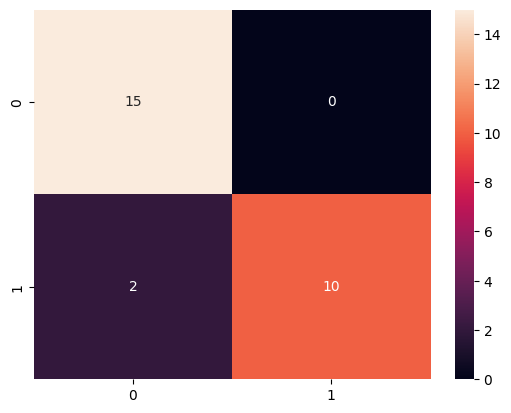

In [25]:
#Importing Confusion Matrix
#Comparing the predictions against the actual observations in y_val
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True)

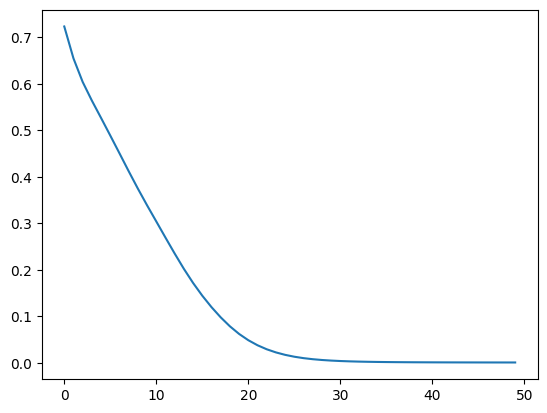

In [26]:
# Plotting graph for MLPClassifier

loss_values = model.loss_curve_
plt.plot(loss_values)
plt.show()

In [27]:
# save the model to disk

filename = 'E-Coli_model.pickle'
pickle.dump(model, open(filename, 'wb'))

In [28]:
genome = "ttactagcaatacgcttgcgttcggtggttaagtatgtataatgcgcgggcttgtcg"
# genome_false = "ttaacattaataaataaggaggctctaatggcactcattagccaatcaatcaagaac"
genome_list = list(genome)
print(genome_list)
df_test = pd.DataFrame(genome_list)
df_test = df_test.transpose()

['t', 't', 'a', 'c', 't', 'a', 'g', 'c', 'a', 'a', 't', 'a', 'c', 'g', 'c', 't', 't', 'g', 'c', 'g', 't', 't', 'c', 'g', 'g', 't', 'g', 'g', 't', 't', 'a', 'a', 'g', 't', 'a', 't', 'g', 't', 'a', 't', 'a', 'a', 't', 'g', 'c', 'g', 'c', 'g', 'g', 'g', 'c', 't', 't', 'g', 't', 'c', 'g']


In [29]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,Class
0,t,a,c,t,a,g,c,a,a,t,...,g,c,t,t,g,t,c,g,t,1
1,t,g,c,t,a,t,c,c,t,g,...,c,a,t,c,g,c,c,a,a,1
2,g,t,a,c,t,a,g,a,g,a,...,c,a,c,c,c,g,g,c,g,1
3,a,a,t,t,g,t,g,a,t,g,...,a,a,c,a,a,a,c,t,c,1
4,t,c,g,a,t,a,a,t,t,a,...,c,c,g,t,g,g,t,a,g,1


In [31]:
encoder = pickle.load(open("EColi-encoder.pickle", 'rb')) 
data_test = encoder.transform(df_test).toarray()
print(model.predict(data_test))

[1]


In [32]:
type(model.predict(data_test)[0])

numpy.int64

In [ ]:
# load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, Y_test)